# Introduction

Opencv is a module that provide us with the ability to interact with images and videos. It’s essential in any computer vision process, whether it has a machine learning algorithm or not.
We will use some other packages also like numpy (opencv relies on numpy), matplotlib and others.


Any image is a matrix, the different valus of it determines the intensity and colors.

# Packages

* Opencv
* Numpy
* Matplotlib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_fig(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
    plt.show()

def make_fig_gray(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
    plt.show()

def display_image(image, cmap):
    plt.figure(figsize=(20, 20))
    plt.imshow(image, cmap=cmap)
    plt.show()

# Image Basics

## Pixels

If the image is a 500x300, then it has 15000 pixels. Every pixel has a value between 0 and 255 (data type = uint8).\
Normally the image is represented in RGB color range, with 3 values in each pixel. the value of the red, green, blue channel represent the intensity of that color in that pixel.\
Some color values:

For your reference, here are some common colors represented
as RGB tuples:
- Black: (0,0,0)
- White: (255,255,255)
- Red: (255,0,0)
- Green: (0,255,0)
- Blue: (0,0,255)
- Aqua: (0,255,255)
- Fuchsia: (255,0,255)
- Maroon: (128,0,0)
- Navy: (0,0,128)
- Olive: (128,128,0)
- Purple: (128,0,128)
- Teal: (0,128,128)
- Yellow: (255,255,0)

## Read Image

In [3]:
dog_image_path = 'C:\\Users\\Muhammad Tarek\\Downloads\\doggy.jpg'
dog_image_bgr = cv2.imread(dog_image_path)
cat_image_path = 'C:\\Users\\Muhammad Tarek\\Downloads\\cat.jpg'
cat_image_bgr = cv2.imread(cat_image_path)

## Print Image

In [4]:
print(dog_image_bgr)

[[[107 170 154]
  [107 170 154]
  [107 170 154]
  ...
  [110 174 168]
  [110 174 168]
  [110 174 168]]

 [[107 170 154]
  [107 170 154]
  [107 170 154]
  ...
  [110 174 168]
  [110 174 168]
  [110 174 168]]

 [[107 170 154]
  [107 170 154]
  [106 169 153]
  ...
  [110 174 168]
  [110 174 168]
  [110 174 168]]

 ...

 [[ 57 131 107]
  [ 60 134 110]
  [ 64 136 114]
  ...
  [ 69 138 117]
  [ 74 137 117]
  [ 76 137 117]]

 [[ 56 131 109]
  [ 57 130 108]
  [ 59 130 110]
  ...
  [ 65 134 113]
  [ 72 137 116]
  [ 77 140 120]]

 [[ 56 131 109]
  [ 55 130 108]
  [ 59 130 110]
  ...
  [ 65 134 113]
  [ 71 136 115]
  [ 76 139 119]]]


In [5]:
type(dog_image_bgr)

numpy.ndarray

In [6]:
print(dog_image_bgr.shape)

(602, 1200, 3)


In [7]:
# CONVERT IMAGES FROM BGR TO RGB
dog_image_rgb = cv2.cvtColor(dog_image_bgr, cv2.COLOR_BGR2RGB)
cat_image_rgb = cv2.cvtColor(cat_image_bgr, cv2.COLOR_BGR2RGB)
print("Converted")

Converted


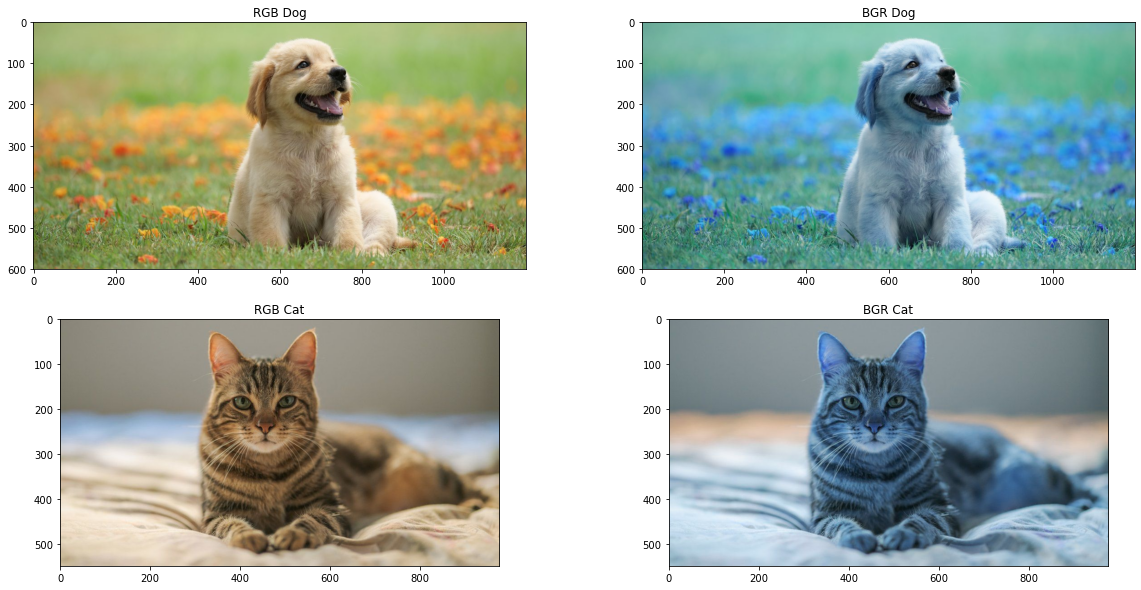

In [8]:
# SHOW IMAGES IN DIFFERENT FORMATS
images = [dog_image_rgb, dog_image_bgr, cat_image_rgb, cat_image_bgr]
titles = ["RGB Dog", "BGR Dog", "RGB Cat", "BGR Cat"]
plots = [2, 2]
size = (20, 10)
make_fig(images, titles, plots, size)

In [9]:
cv2.imshow("dog bgr", dog_image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Get specific part of an image

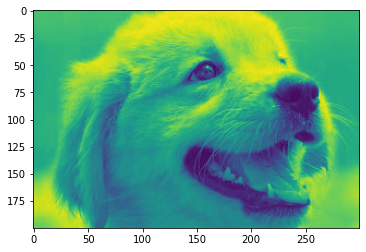

In [10]:
dog_head = dog_image_rgb[50:250, 500:800, :1]
plt.imshow(dog_head)

# Gray Scale of Image

Gray scale image is an image with black and white\
255 -> white\
0 -> black\
the value between them is the brightness of a pixel.

## How it works
Get every value of the 3-channeled image, and sum it up and divide by 3

In [11]:
# CONVERT IMAGE TO GRAY SCALE
dog_image_gray = cv2.cvtColor(dog_image_bgr, cv2.COLOR_BGR2GRAY)
print(dog_image_gray.shape)
print(dog_image_gray)

(602, 1200)
[[158 158 158 ... 165 165 165]
 [158 158 158 ... 165 165 165]
 [158 158 157 ... 165 165 165]
 ...
 [115 118 121 ... 124 124 124]
 [116 115 116 ... 120 123 127]
 [116 115 116 ... 120 122 126]]


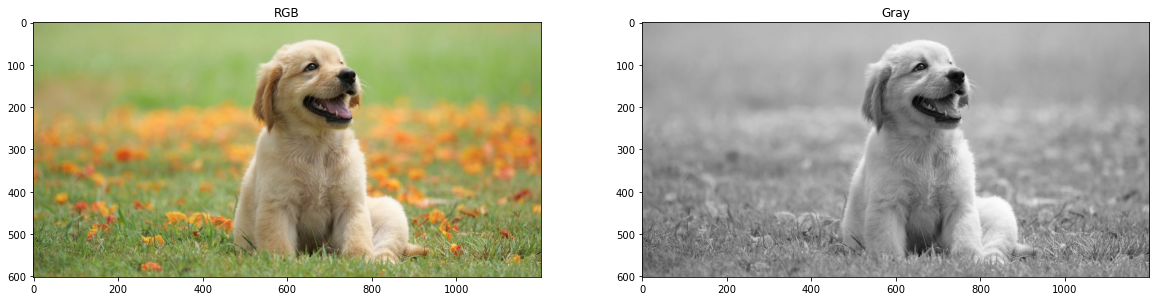

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(dog_image_rgb)
plt.title('RGB')
plt.subplot(122)
plt.imshow(dog_image_gray, cmap='gray')
plt.title('Gray')
plt.show()

# Thresholding
It's the process of making an image binary, black and white depending on a threshold\
It's mostly applied on gray scale image because it's one channel only, but also can be made on a colord image.\
There are different types of thresholding:

### Simple Threshold
- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

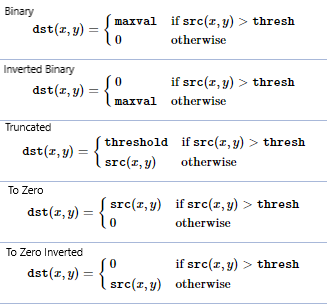

In [13]:
# SIMPLE THRESHOLDING ON DOG IMAGE
_, dog_image_binray = cv2.threshold(dog_image_gray, 127, 255, cv2.THRESH_BINARY)
_, dog_image_binray_inv = cv2.threshold(dog_image_gray, 127, 255, cv2.THRESH_BINARY_INV)
_, dog_image_to_zero = cv2.threshold(dog_image_gray, 127, 255, cv2.THRESH_TOZERO)
_, dog_image_to_zero_inv = cv2.threshold(dog_image_gray, 127, 255, cv2.THRESH_TOZERO_INV)

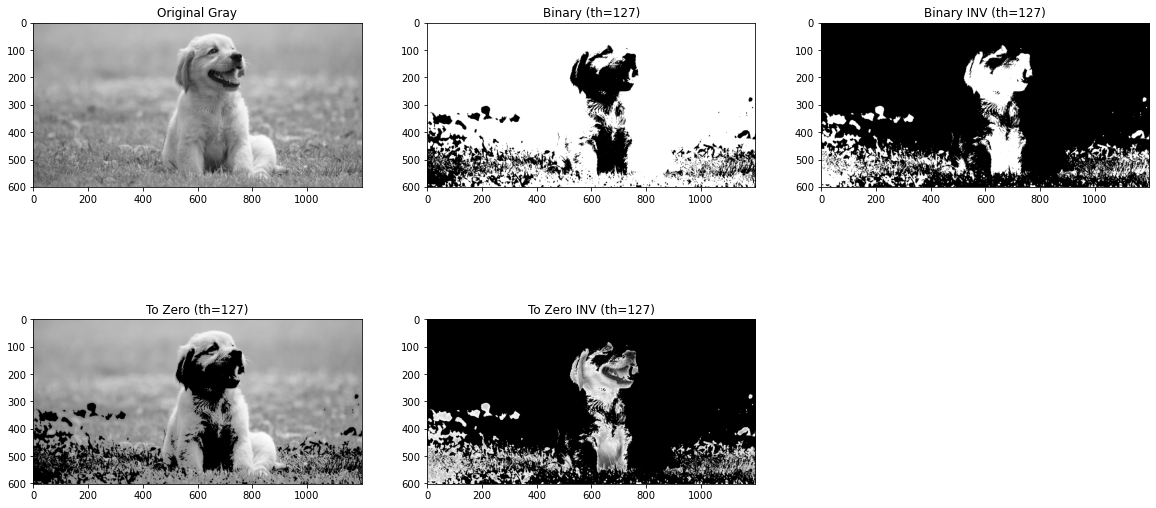

In [14]:
images = [dog_image_gray, dog_image_binray, dog_image_binray_inv, dog_image_to_zero, dog_image_to_zero_inv]
titles = ['Original Gray', 'Binary (th=127)', 'Binary INV (th=127)', 'To Zero (th=127)', 'To Zero INV (th=127)']
plots = [2, 3]
size = (20, 10)
make_fig_gray(images, titles, plots, size)

### Adaptive Threshold
In the previous section, we used global value as threshold, but it may be good in all cases. Here the algorithm works in regions, may be differenet threshold values in every region in the same picture.

- cv2.ADAPTIVE_THRESH_MEAN_C
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C


In [15]:
# ADAPTIVE THRESHOLDING ON DOG IMAGE
dog_image_adaptive_mean = cv2.adaptiveThreshold(dog_image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
dog_image_adaptive_gaussian = cv2.adaptiveThreshold(dog_image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

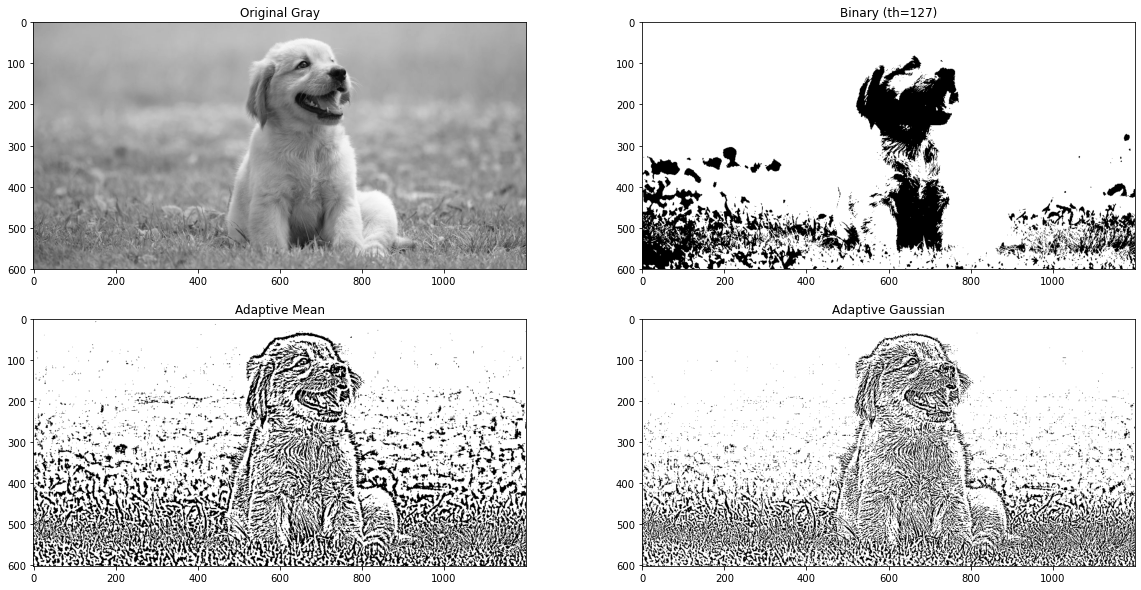

In [16]:
images = [dog_image_gray, dog_image_binray, dog_image_adaptive_mean, dog_image_adaptive_gaussian]
titles = ['Original Gray', 'Binary (th=127)', 'Adaptive Mean', 'Adaptive Gaussian']
plots = [2, 2]
size = (20, 10)
make_fig_gray(images, titles, plots, size)

### Otsu Threshold
In global thresholding, we used an arbitrary chosen value as a threshold. In contrast, Otsu's method avoids having to choose a value and determines it automatically.

Consider an image with only two distinct image values (bimodal image), where the histogram would only consist of two peaks. A good threshold would be in the middle of those two values. Similarly, Otsu's method determines an optimal global threshold value from the image histogram.

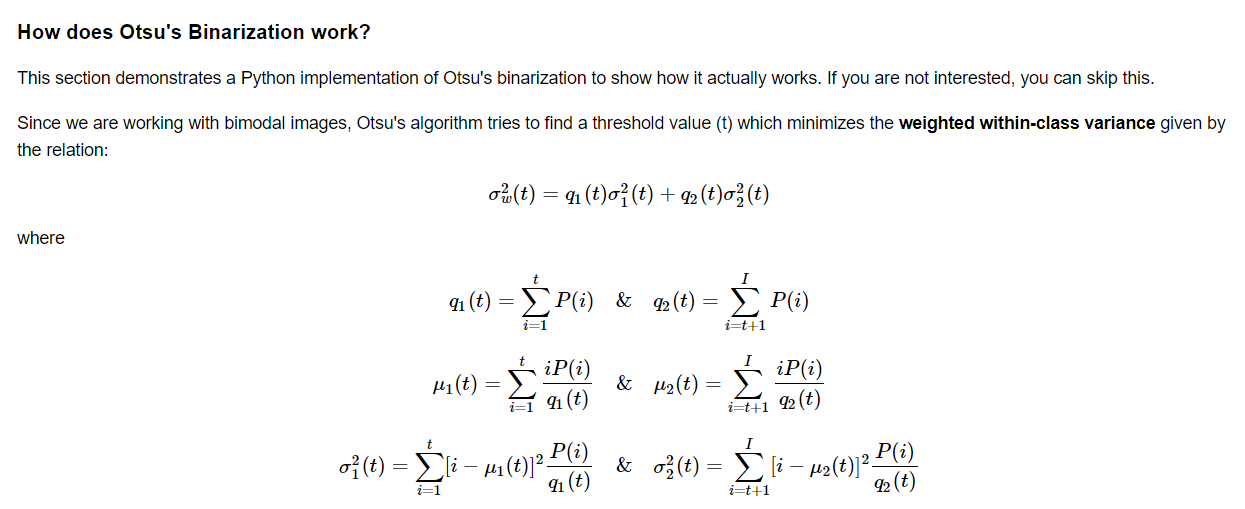

In [17]:
_, dog_image_otsu = cv2.threshold(dog_image_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

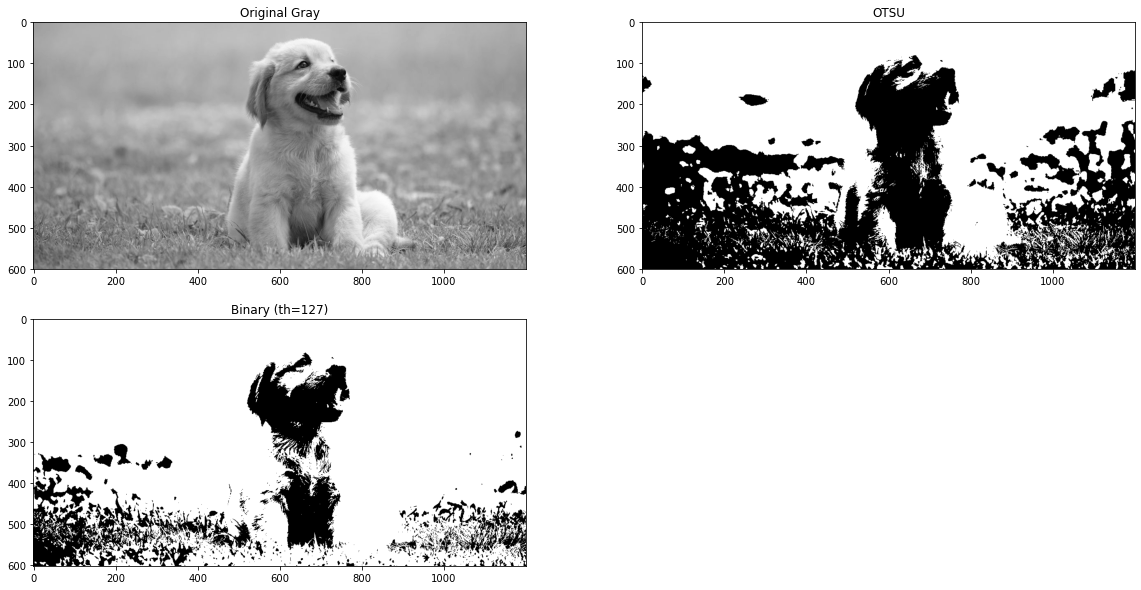

In [18]:
images = [dog_image_gray, dog_image_otsu, dog_image_binray]
titles = ['Original Gray', 'OTSU', 'Binary (th=127)']
plots = [2, 2]
size = (20, 10)
make_fig_gray(images, titles, plots, size)

# Kernel
The kernel is a matrix that has a specified size and varys with every operation\
<b>To get familiar with the kernel term use this: https://setosa.io/ev/image-kernels/</b>

In [19]:
dog_image_otsu_eroded = cv2.erode(dog_image_otsu, (7, 7), iterations=5)
dog_image_otsu_dilated = cv2.dilate(dog_image_otsu, (7, 7), iterations=5)

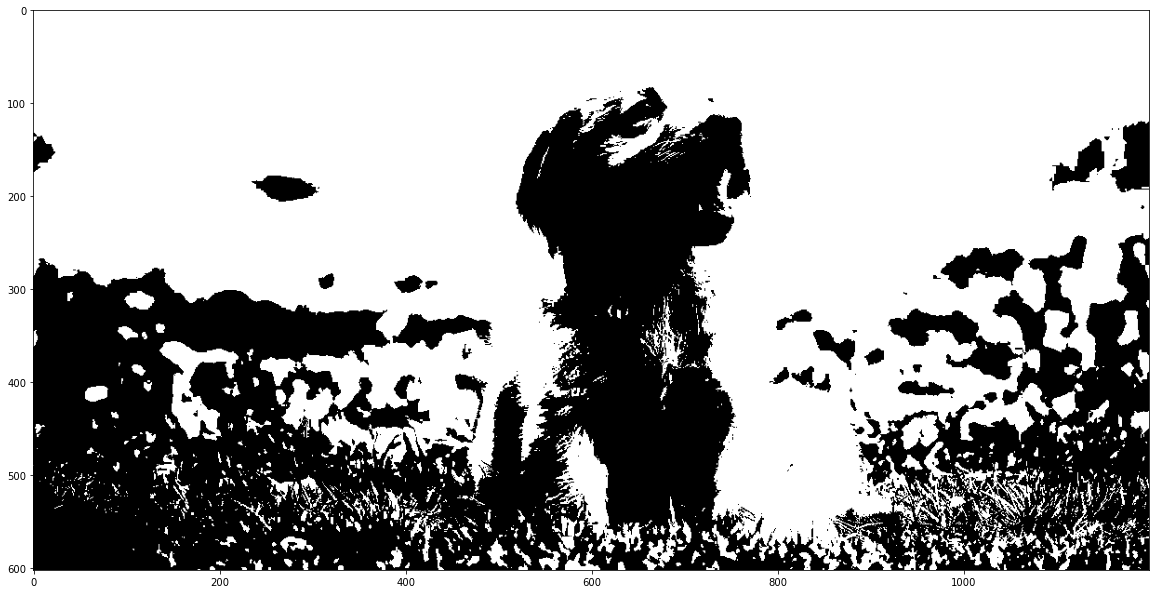

In [20]:
display_image(dog_image_otsu, 'gray')

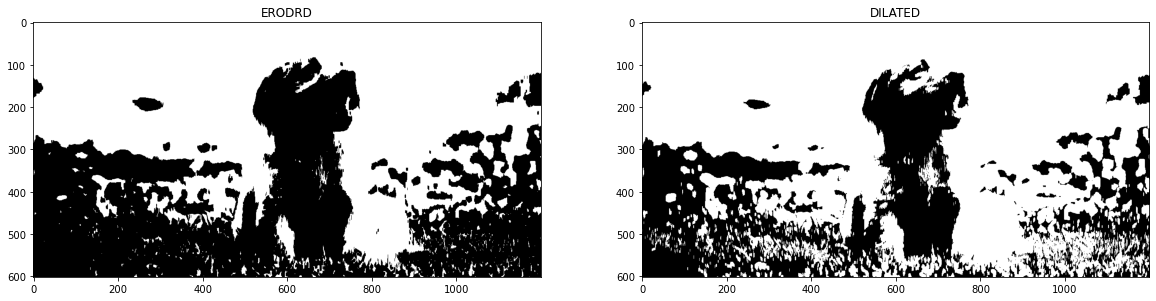

In [21]:
images = [dog_image_otsu_eroded, dog_image_otsu_dilated]
titles = ['ERODRD', 'DILATED']
size = (20, 10)
plots = [1, 2]
make_fig_gray(images, titles, plots, size)

In [22]:
x = dog_image_rgb.copy()
y = dog_image_rgb.copy()
x[dog_image_otsu_eroded>0] = 0
y[dog_image_otsu_dilated>0] = 0

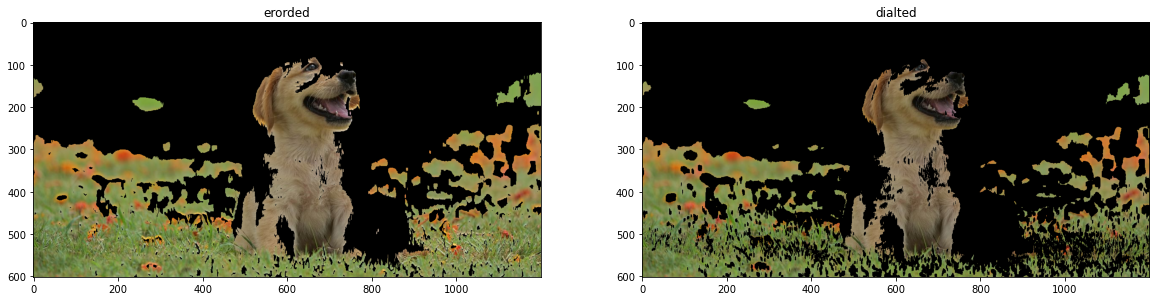

In [23]:
images = [x, y]
titles = ['erorded', 'dialted']
plots = [1, 2]
size = (20, 10)
make_fig(images, titles, plots, size)

# Blurring Image
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. (Well, there are blurring techniques which do not blur edges). OpenCV provides mainly four types of blurring techniques.
## Blurring Types
### Averaging
This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function <b>cv2.blur()</b> or <b>cv2.boxFilter()</b>.We should specify the width and height of kernel.
### Gaussian
In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, <b>cv2.GaussianBlur()</b>. We should specify the width and height of the kernel which should be <b>positive and odd</b>. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.\
<b> more abour Gaussian distribution: https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm</b>
### Median
Here, the function <b>cv2.medianBlur()</b> computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a <b>positive odd integer</b>.
### Bilateral 
As we noted, the filters we presented earlier tend to blur edges. This is not the case for the bilateral filter, <b>cv2.bilateralFilter()</b>, which was defined for, and is highly effective at noise removal while preserving edges. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It does not consider whether pixels have almost the same intensity value and does not consider whether the pixel lies on an edge or not. The resulting effect is that Gaussian filters tend to blur edges, which is undesirable.

The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

<b>more about bilateral filter: https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/</b>

In [24]:
dog_image_average_blur = cv2.blur(dog_image_rgb, ksize=(11, 11))
dog_image_gaussian_blur = cv2.GaussianBlur(dog_image_rgb, ksize=(11, 11), sigmaX=0, sigmaY=0)
dog_image_median_blur = cv2.medianBlur(dog_image_rgb, ksize=11)
dog_image_bilateral = cv2.bilateralFilter(dog_image_rgb, d=9, sigmaColor=75, sigmaSpace=75)

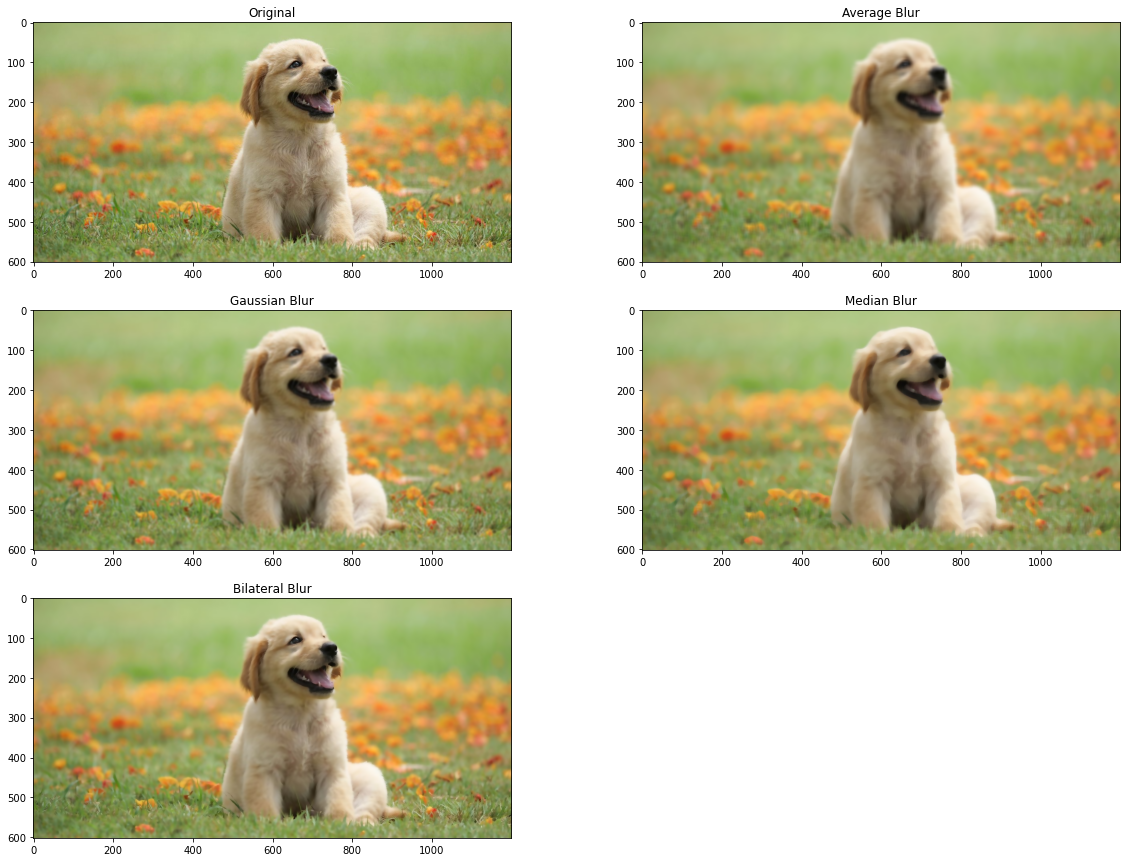

In [25]:
images = [dog_image_rgb, dog_image_average_blur, dog_image_gaussian_blur, dog_image_median_blur, dog_image_bilateral]
titles = ["Original", "Average Blur", "Gaussian Blur", "Median Blur", "Bilateral Blur"]
plots = [3, 2]
size = (20, 15)
make_fig(images, titles, plots, size)

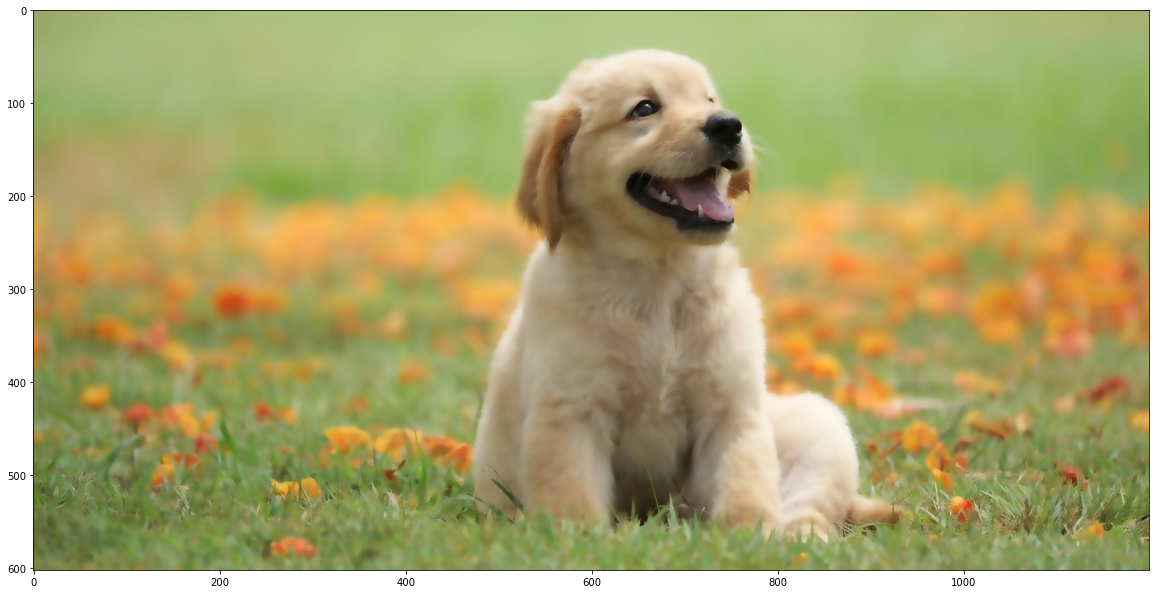

In [26]:
display_image(dog_image_bilateral, None)

# Thresholding After Blurring

In [27]:
_, dog_image_binary_average_blurred = cv2.threshold(cv2.cvtColor(dog_image_average_blur, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
_, dog_image_binary_gaussian_blurred = cv2.threshold(cv2.cvtColor(dog_image_gaussian_blur, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
_, dog_image_binary_median_blurred = cv2.threshold(cv2.cvtColor(dog_image_median_blur, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
_, dog_image_binary_bilateral_blurred = cv2.threshold(cv2.cvtColor(dog_image_bilateral, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
_, dog_image_otsu_average_blurred = cv2.threshold(cv2.cvtColor(dog_image_average_blur, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, dog_image_otsu_gaussian_blurred = cv2.threshold(cv2.cvtColor(dog_image_gaussian_blur, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, dog_image_otsu_median_blurred = cv2.threshold(cv2.cvtColor(dog_image_median_blur, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, dog_image_otsu_bilateral_blurred = cv2.threshold(cv2.cvtColor(dog_image_bilateral, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

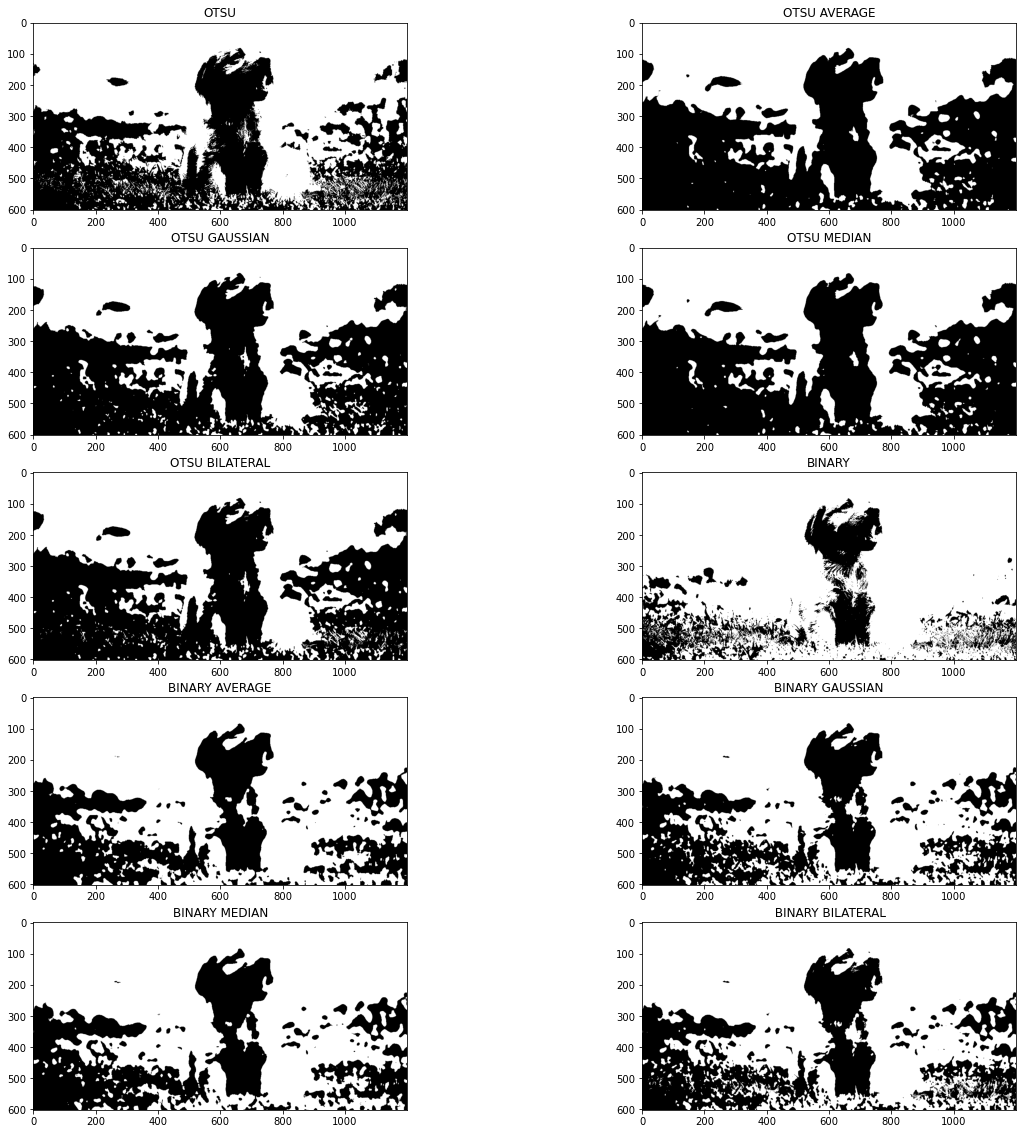

In [28]:
images = [dog_image_otsu, dog_image_otsu_average_blurred, dog_image_otsu_gaussian_blurred,\
          dog_image_otsu_median_blurred, dog_image_otsu_bilateral_blurred, dog_image_binray, dog_image_binary_average_blurred,\
          dog_image_binary_gaussian_blurred, dog_image_binary_median_blurred, dog_image_binary_bilateral_blurred]
titles = ['OTSU', 'OTSU AVERAGE', 'OTSU GAUSSIAN', 'OTSU MEDIAN' ,'OTSU BILATERAL',\
          'BINARY', 'BINARY AVERAGE', 'BINARY GAUSSIAN', 'BINARY MEDIAN', ' BINARY BILATERAL']
plots = [5, 2]
size = (20, 20)
make_fig_gray(images, titles, plots, size)

## Trying to get the Dog out of picture

In [29]:
dog_only_blurred = dog_image_rgb.copy()
dog_only_bilateral = dog_image_rgb.copy()
dog_only = dog_image_rgb.copy()
dog_only_blurred[dog_image_otsu_gaussian_blurred>0] = 0
dog_only[dog_image_adaptive_mean>0] = 0
dog_only_bilateral[dog_image_otsu_bilateral_blurred>0] = 0

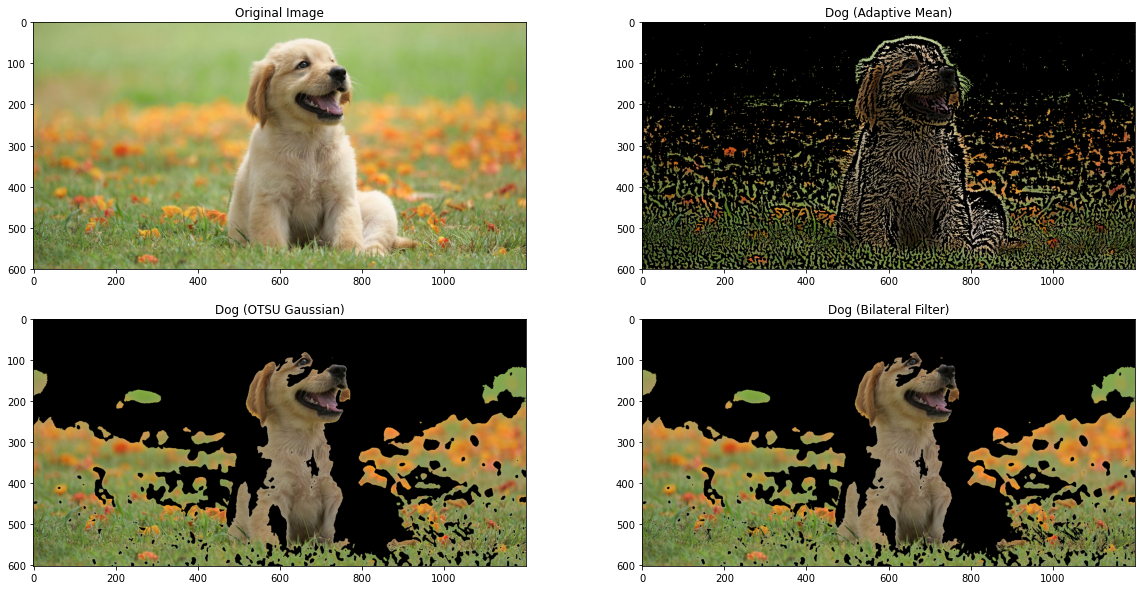

In [30]:
images = [dog_image_rgb, dog_only, dog_only_blurred ,dog_only_bilateral]
titles = ['Original Image', 'Dog (Adaptive Mean)', 'Dog (OTSU Gaussian)', 'Dog (Bilateral Filter)']
plots = [2, 2]
size = (20, 10)
make_fig(images, titles, plots, size)

In [31]:
zeros = np.ones_like(dog_image_bgr)*255

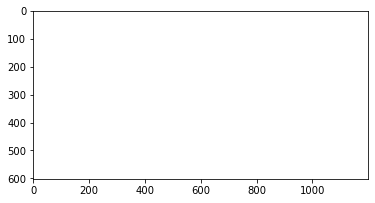

In [32]:
plt.imshow(zeros)

# OPENCV DOCS : https://docs.opencv.org/master/d6/d00/tutorial_py_root.html